In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 50, 50
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Re   = 100.0
# dt   = 0.01
# tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=10.0, dt=0.001, Re=100.0)

In [3]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

poisson_options = dict(maxiter = 2000, tol = 1e-9)
poisson_options['lu'], poisson_options['mtx'] = flowx.poisson.build_sparse(gridc, 'pres')

# 1st iteration with Euler explicit scheme

# Predictor Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'predictor')

# Divergence Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'divergence')

# Solve the pressure Poisson equation 
scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', 
                                                                                    poisson_options)
# Corrector Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'corrector')

# Display stats
if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

scalars.advance()


while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Predictor Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'predictor')

    # Divergence Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'divergence')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', 
                                                                             poisson_options)
    
    # Corrector Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'corrector')
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8267846110005606e-11
Max, Min, U   : 2.0, -0.009926372255044525
Max, Min, V   : 0.024978104639821384, -0.024978104639821384
Max, Min, P   : 2.504702926962284, -2.332869618243773
Max, Min, DIV : 4.9960036108132044e-15, -2.7755575615628914e-15


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7583081374214244e-11
Max, Min, U   : 2.0, -0.05558322752245583
Max, Min, V   : 0.1704656781108312, -0.1704656781108312
Max, Min, P   : 1.9763575094966874, -1.793255028843147
Max, Min, DIV : 2.8102520310824275e-15, -2.5951463200613034e-15


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3390452981602598e-11
Max, Min, U   : 2.0, -0.08477409215891786
Max, Min, V   : 0.2327100934933093, -0.2327100934933093
Max, Min, P   : 1.7484721571857016, -1.5181451

------------ Time = 0.34000000000000025 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.176887292704067e-12
Max, Min, U   : 2.0, -0.16870319227354932
Max, Min, V   : 0.3232941516595532, -0.4203903510750166
Max, Min, P   : 1.494545497501679, -0.92618322561185
Max, Min, DIV : 4.440892098500626e-15, -4.218847493575595e-15


------------ Time = 0.35000000000000026 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.232352831242782e-12
Max, Min, U   : 2.0, -0.16942143199402795
Max, Min, V   : 0.3236069302461133, -0.4216764237069353
Max, Min, P   : 1.4750203705507907, -0.9452053120288787
Max, Min, DIV : 4.718447854656915e-15, -4.5102810375396984e-15


------------ Time = 0.36000000000000026 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.7228739377853316e-12
Max, Min, U   : 2.0, -0.16998552428154173
Max, Min, V   : 0.3239012422895326, -0.4228920541142338
Max, Min, P   : 1.4769603638084892, -0.94

------------ Time = 0.7000000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4357413035954845e-12
Max, Min, U   : 2.0, -0.19398707133053783
Max, Min, V   : 0.32859454559977563, -0.46312618058841104
Max, Min, P   : 1.5340103472643398, -0.890766836804079
Max, Min, DIV : 4.9960036108132044e-15, -5.190292640122607e-15


------------ Time = 0.7100000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.966364932053596e-12
Max, Min, U   : 2.0, -0.1945477098191825
Max, Min, V   : 0.3286565211268559, -0.4640243753172896
Max, Min, P   : 1.5158864959596223, -0.909225836480833
Max, Min, DIV : 5.162537064506978e-15, -5.218048215738236e-15


------------ Time = 0.7200000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.086261839509668e-12
Max, Min, U   : 2.0, -0.19506159416953459
Max, Min, V   : 0.328716389579999, -0.4648965006089109
Max, Min, P   : 1.5189967404788738, -0.9064

------------ Time = 1.0399999999999963 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.547289272279401e-12
Max, Min, U   : 2.0, -0.20943307493783322
Max, Min, V   : 0.32990682624696066, -0.4832894176446862
Max, Min, P   : 1.5411261807046903, -0.8947245180109443
Max, Min, DIV : 4.6074255521944e-15, -5.0584536559483695e-15


------------ Time = 1.0499999999999952 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2124396802001125e-12
Max, Min, U   : 2.0, -0.20993465899883107
Max, Min, V   : 0.32992937162934033, -0.48365993803910245
Max, Min, P   : 1.55468435512449, -0.8814624241202562
Max, Min, DIV : 4.551914400963142e-15, -5.329070518200751e-15


------------ Time = 1.059999999999994 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.160962055878394e-12
Max, Min, U   : 2.0, -0.21041330470903225
Max, Min, V   : 0.329951349868156, -0.48402203250420867
Max, Min, P   : 1.5388415302080227, -0.8975

------------ Time = 1.3999999999999566 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.479803153246223e-12
Max, Min, U   : 2.0, -0.22026744791730019
Max, Min, V   : 0.3304609740994222, -0.49369678333841016
Max, Min, P   : 1.565320720831108, -0.879833916075635
Max, Min, DIV : 4.6629367034256575e-15, -4.6629367034256575e-15


------------ Time = 1.4099999999999555 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.344874093625117e-12
Max, Min, U   : 2.0, -0.22039765093760422
Max, Min, V   : 0.3304710767196344, -0.4940742674561901
Max, Min, P   : 1.5533653503660685, -0.8920103661517844
Max, Min, DIV : 5.162537064506978e-15, -4.524158825347513e-15


------------ Time = 1.4199999999999544 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.978569777818848e-12
Max, Min, U   : 2.0, -0.2206894268017106
Max, Min, V   : 0.33048098575486096, -0.4944452480399685
Max, Min, P   : 1.5708378719018694, -0.874

------------ Time = 1.7399999999999192 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.6351009105256855e-12
Max, Min, U   : 2.0, -0.22707103658332814
Max, Min, V   : 0.3307199502545374, -0.5035903346457419
Max, Min, P   : 1.5629879313928299, -0.8887516115701108
Max, Min, DIV : 4.593547764386585e-15, -4.773959005888173e-15


------------ Time = 1.749999999999918 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.797412534592108e-12
Max, Min, U   : 2.0, -0.22722663720109462
Max, Min, V   : 0.3307255554860463, -0.5038087111030075
Max, Min, P   : 1.5675962593013457, -0.8843108988207813
Max, Min, DIV : 4.3298697960381105e-15, -4.6629367034256575e-15


------------ Time = 1.759999999999917 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.958173079166635e-12
Max, Min, U   : 2.0, -0.22737547553547843
Max, Min, V   : 0.33073107476881086, -0.5040238675563176
Max, Min, P   : 1.5666338414492749, -0.88

------------ Time = 2.069999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.748636150240976e-12
Max, Min, U   : 2.0, -0.23074642528485886
Max, Min, V   : 0.3308677753810334, -0.5093803645078785
Max, Min, P   : 1.578265173769841, -0.8783736230964967
Max, Min, DIV : 5.245803791353865e-15, -5.329070518200751e-15


------------ Time = 2.079999999999882 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.415712043073035e-12
Max, Min, U   : 2.0, -0.23083529295501823
Max, Min, V   : 0.3308712898667357, -0.5095183895286112
Max, Min, P   : 1.5620601704618877, -0.8947087718319461
Max, Min, DIV : 4.551914400963142e-15, -5.398459457239824e-15


------------ Time = 2.089999999999881 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.413707102024374e-12
Max, Min, U   : 2.0, -0.23092015177070851
Max, Min, V   : 0.33087475921617304, -0.5096546357912399
Max, Min, P   : 1.5761148523454103, -0.8807832

------------ Time = 2.3999999999998467 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.627062082884708e-12
Max, Min, U   : 2.0, -0.23333657724108864
Max, Min, V   : 0.33096361864426954, -0.5131363501395585
Max, Min, P   : 1.5851570594497648, -0.8753130655578883
Max, Min, DIV : 4.884981308350689e-15, -5.218048215738236e-15


------------ Time = 2.4099999999998456 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.173454070835134e-12
Max, Min, U   : 2.0, -0.2334089019414363
Max, Min, V   : 0.3309659817237078, -0.5132285713537079
Max, Min, P   : 1.5699672186992033, -0.8906054853075741
Max, Min, DIV : 4.551914400963142e-15, -4.3298697960381105e-15


------------ Time = 2.4199999999998445 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.481584328937203e-12
Max, Min, U   : 2.0, -0.2334787081851663
Max, Min, V   : 0.3309683185408858, -0.5133197403010429
Max, Min, P   : 1.5733895906986477, -0.8872

------------ Time = 2.749999999999808 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.02822168906779e-12
Max, Min, U   : 2.0, -0.2348465606980541
Max, Min, V   : 0.3310329369051687, -0.5158274282121883
Max, Min, P   : 1.5796674823241301, -0.8840040499021873
Max, Min, DIV : 4.9439619065339e-15, -5.440092820663267e-15


------------ Time = 2.759999999999807 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.550920675826659e-12
Max, Min, U   : 2.0, -0.23490743021032223
Max, Min, V   : 0.33103457389063246, -0.5158905590049164
Max, Min, P   : 1.5834652097467257, -0.8802871177751828
Max, Min, DIV : 4.440892098500626e-15, -5.3013149425851225e-15


------------ Time = 2.769999999999806 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.8106969110731566e-12
Max, Min, U   : 2.0, -0.23496665340719777
Max, Min, V   : 0.33103619485927865, -0.5159530499207619
Max, Min, P   : 1.5739328613781305, -0.8898997

------------ Time = 3.0999999999997696 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.389498325408367e-12
Max, Min, U   : 2.0, -0.23616521034262097
Max, Min, V   : 0.3310819082590102, -0.5179256763301996
Max, Min, P   : 1.5863680109266614, -0.8798391643576221
Max, Min, DIV : 4.9404924595819466e-15, -4.829470157119431e-15


------------ Time = 3.1099999999997685 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.13649968683676e-12
Max, Min, U   : 2.0, -0.23618303157765236
Max, Min, V   : 0.3310830894902426, -0.5179889520504399
Max, Min, P   : 1.5668705059361638, -0.8994010433915792
Max, Min, DIV : 5.10702591327572e-15, -4.440892098500626e-15


------------ Time = 3.1199999999997674 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1877784357198795e-12
Max, Min, U   : 2.0, -0.23619998792800173
Max, Min, V   : 0.33108426033557703, -0.5180516648968183
Max, Min, P   : 1.5712900261524239, -0.895

------------ Time = 3.449999999999731 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.552232608704644e-12
Max, Min, U   : 2.0, -0.2370437487547783
Max, Min, V   : 0.3311177734366988, -0.5198439662389067
Max, Min, P   : 1.583601197126611, -0.8846353428220164
Max, Min, DIV : 5.10702591327572e-15, -5.773159728050814e-15


------------ Time = 3.45999999999973 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.472129248072961e-12
Max, Min, U   : 2.0, -0.23707553408273213
Max, Min, V   : 0.3311186524044208, -0.5198909065663138
Max, Min, P   : 1.5942328138572526, -0.8740554918798724
Max, Min, DIV : 5.551115123125783e-15, -5.384581669432009e-15


------------ Time = 3.469999999999729 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4990835196814975e-12
Max, Min, U   : 2.0, -0.23710665868304312
Max, Min, V   : 0.33111952430708824, -0.5199374665281196
Max, Min, P   : 1.5934908996412225, -0.874848856

------------ Time = 3.8099999999996914 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5421673484626965e-12
Max, Min, U   : 2.0, -0.23783878910586356
Max, Min, V   : 0.33114543556069775, -0.5213199873561682
Max, Min, P   : 1.5821063884734032, -0.8878098121529707
Max, Min, DIV : 5.162537064506978e-15, -4.773959005888173e-15


------------ Time = 3.8199999999996903 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.25156376467438e-12
Max, Min, U   : 2.0, -0.23785244503760683
Max, Min, V   : 0.331146100143038, -0.5213554253488125
Max, Min, P   : 1.591421681922343, -0.8785362035478744
Max, Min, DIV : 4.912736883966318e-15, -4.884981308350689e-15


------------ Time = 3.829999999999689 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.757295310650501e-12
Max, Min, U   : 2.0, -0.23786573566255015
Max, Min, V   : 0.3311467597776555, -0.5213905989239765
Max, Min, P   : 1.5920491612999785, -0.877950

------------ Time = 4.179999999999731 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5345426020943935e-12
Max, Min, U   : 2.0, -0.2381425274096593
Max, Min, V   : 0.3311670560698675, -0.5224728202176786
Max, Min, P   : 1.5928793554324752, -0.8784271654418514
Max, Min, DIV : 5.329070518200751e-15, -5.329070518200751e-15


------------ Time = 4.189999999999734 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.17977890701262e-12
Max, Min, U   : 2.0, -0.2381460855292227
Max, Min, V   : 0.3311675645776311, -0.5224999406670977
Max, Min, P   : 1.583862282240885, -0.8874778134839025
Max, Min, DIV : 4.551914400963142e-15, -4.9960036108132044e-15


------------ Time = 4.199999999999737 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.866570329116016e-12
Max, Min, U   : 2.0, -0.23816849991094924
Max, Min, V   : 0.3311680695356749, -0.5225268724842707
Max, Min, P   : 1.5907193551589176, -0.880654122

------------ Time = 4.4999999999998375 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.133985754748238e-12
Max, Min, U   : 2.0, -0.2387308651377978
Max, Min, V   : 0.3311817068158396, -0.5232545914436505
Max, Min, P   : 1.585758438531202, -0.8865323601765064
Max, Min, DIV : 4.884981308350689e-15, -4.9960036108132044e-15


------------ Time = 4.509999999999841 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.068415027276655e-12
Max, Min, U   : 2.0, -0.23874589618061504
Max, Min, V   : 0.33118211526392644, -0.523276402268834
Max, Min, P   : 1.6013399861496402, -0.8709787668130364
Max, Min, DIV : 5.10702591327572e-15, -5.329070518200751e-15


------------ Time = 4.519999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.783106161201549e-12
Max, Min, U   : 2.0, -0.23876072083632663
Max, Min, V   : 0.33118252098777956, -0.5232980687190536
Max, Min, P   : 1.5940941754336762, -0.8782523

------------ Time = 4.859999999999958 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.072888837881047e-12
Max, Min, U   : 2.0, -0.2391597247578226
Max, Min, V   : 0.33119483751169454, -0.5239564279236645
Max, Min, P   : 1.573852458766299, -0.8993515291604741
Max, Min, DIV : 5.218048215738236e-15, -4.884981308350689e-15


------------ Time = 4.869999999999961 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.900280483845972e-12
Max, Min, U   : 2.0, -0.23916883214113754
Max, Min, V   : 0.33119516013199046, -0.5239736925813213
Max, Min, P   : 1.5869003093888518, -0.8863265001921918
Max, Min, DIV : 4.9404924595819466e-15, -3.9968028886505635e-15


------------ Time = 4.879999999999964 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.024294832436385e-12
Max, Min, U   : 2.0, -0.2391778125558953
Max, Min, V   : 0.331195480688598, -0.5239908479527053
Max, Min, P   : 1.599910383305868, -0.87333912

------------ Time = 5.220000000000078 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.563719976108193e-12
Max, Min, U   : 2.0, -0.2394184870667048
Max, Min, V   : 0.33120525341715606, -0.5245144773223179
Max, Min, P   : 1.5916899039689343, -0.882260538733706
Max, Min, DIV : 4.9960036108132044e-15, -5.218048215738236e-15


------------ Time = 5.230000000000081 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.643791006918187e-12
Max, Min, U   : 2.0, -0.23942394700461017
Max, Min, V   : 0.3312055104826327, -0.5245282690440836
Max, Min, P   : 1.5953926378265502, -0.8785764832227008
Max, Min, DIV : 5.551115123125783e-15, -5.051514762044462e-15


------------ Time = 5.240000000000085 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.0774430877211775e-12
Max, Min, U   : 2.0, -0.2394293287045148
Max, Min, V   : 0.33120576595791135, -0.5245419764596408
Max, Min, P   : 1.5950356434935355, -0.878952

------------ Time = 5.570000000000195 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.1526380488312736e-12
Max, Min, U   : 2.0, -0.23956920215926783
Max, Min, V   : 0.33121337284560104, -0.5249506181438047
Max, Min, P   : 1.600700251223038, -0.8738462653546455
Max, Min, DIV : 5.134781488891349e-15, -4.884981308350689e-15


------------ Time = 5.580000000000198 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.970353474993218e-12
Max, Min, U   : 2.0, -0.23957246363366483
Max, Min, V   : 0.33121358031601156, -0.5249617779417322
Max, Min, P   : 1.5982239976664738, -0.8763379174900242
Max, Min, DIV : 4.690692279041286e-15, -4.3298697960381105e-15


------------ Time = 5.5900000000002015 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.912090546554316e-12
Max, Min, U   : 2.0, -0.2395756762813397
Max, Min, V   : 0.3312137865360665, -0.5249728713003986
Max, Min, P   : 1.5965486091406687, -0.8780

------------ Time = 5.930000000000315 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.370688310279935e-12
Max, Min, U   : 2.0, -0.23966006484565724
Max, Min, V   : 0.3312201100963442, -0.5253134582146799
Max, Min, P   : 1.5992067761556836, -0.875844137690909
Max, Min, DIV : 4.85722573273506e-15, -5.218048215738236e-15


------------ Time = 5.940000000000318 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.547400840971467e-12
Max, Min, U   : 2.0, -0.23966192595451868
Max, Min, V   : 0.331220277385486, -0.5253224800334442
Max, Min, P   : 1.6038731274409848, -0.8711904261609743
Max, Min, DIV : 4.884981308350689e-15, -4.5102810375396984e-15


------------ Time = 5.950000000000322 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.9402298416205156e-12
Max, Min, U   : 2.0, -0.23966375712451757
Max, Min, V   : 0.3312204436878733, -0.525331449263162
Max, Min, P   : 1.5792527752395003, -0.895823349

------------ Time = 6.300000000000439 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.131647409785322e-12
Max, Min, U   : 2.0, -0.23984967118049236
Max, Min, V   : 0.33122568895656335, -0.5256146784017276
Max, Min, P   : 1.579301734358338, -0.8961737562872218
Max, Min, DIV : 4.676814491233472e-15, -4.746203430272544e-15


------------ Time = 6.310000000000442 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.7678878869648e-12
Max, Min, U   : 2.0, -0.23985713311790233
Max, Min, V   : 0.3312258236197972, -0.5256219587365907
Max, Min, P   : 1.5949100981978526, -0.8805757193180862
Max, Min, DIV : 5.551115123125783e-15, -4.85722573273506e-15


------------ Time = 6.320000000000445 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.7913674921584536e-12
Max, Min, U   : 2.0, -0.23986454146696493
Max, Min, V   : 0.3312259575025963, -0.5256291973398021
Max, Min, P   : 1.591425090225777, -0.8840709979

------------ Time = 6.660000000000559 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.936464701233728e-12
Max, Min, U   : 2.0, -0.24008751576407317
Max, Min, V   : 0.33123007789306264, -0.5258522058000098
Max, Min, P   : 1.604570213541797, -0.8712437671681347
Max, Min, DIV : 4.6074255521944e-15, -5.009881398621019e-15


------------ Time = 6.670000000000562 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.863466498467921e-12
Max, Min, U   : 2.0, -0.24009330358256817
Max, Min, V   : 0.33123018728957127, -0.5258581330239456
Max, Min, P   : 1.5905767013968428, -0.8852457669984575
Max, Min, DIV : 4.274358644806853e-15, -4.85722573273506e-15


------------ Time = 6.6800000000005655 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3711622341129226e-12
Max, Min, U   : 2.0, -0.24009905156715394
Max, Min, V   : 0.33123029606071724, -0.5258640267009762
Max, Min, P   : 1.5905105790079113, -0.885320

------------ Time = 7.030000000000682 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.214429227005925e-12
Max, Min, U   : 2.0, -0.24027742458156284
Max, Min, V   : 0.33123373689859836, -0.5260506435255804
Max, Min, P   : 1.5850649081571313, -0.8910343007439244
Max, Min, DIV : 5.10702591327572e-15, -5.10702591327572e-15


------------ Time = 7.040000000000686 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.741967186525269e-12
Max, Min, U   : 2.0, -0.2402819292783138
Max, Min, V   : 0.33123382549354324, -0.5260554532291373
Max, Min, P   : 1.5888854833959336, -0.8872206658991465
Max, Min, DIV : 4.884981308350689e-15, -5.329070518200751e-15


------------ Time = 7.050000000000689 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4581380193068255e-12
Max, Min, U   : 2.0, -0.240286404154883
Max, Min, V   : 0.3312339135877448, -0.5260602359874972
Max, Min, P   : 1.5777300910282808, -0.898382961

------------ Time = 7.400000000000806 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.459030542043808e-12
Max, Min, U   : 2.0, -0.24042587346888195
Max, Min, V   : 0.3312367032595351, -0.5262118176656865
Max, Min, P   : 1.6015146333255532, -0.8748178318426348
Max, Min, DIV : 5.329070518200751e-15, -5.122638424559511e-15


------------ Time = 7.410000000000809 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.516603953420926e-12
Max, Min, U   : 2.0, -0.2404294112807239
Max, Min, V   : 0.3312367751626653, -0.5262157279662651
Max, Min, P   : 1.589604200568134, -0.8867339409626833
Max, Min, DIV : 5.773159728050814e-15, -4.496403249731884e-15


------------ Time = 7.420000000000813 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.605924403931371e-12
Max, Min, U   : 2.0, -0.2404329264569433
Max, Min, V   : 0.331236846663083, -0.5262196165355251
Max, Min, P   : 1.5959752274089538, -0.88036855973

------------ Time = 7.7700000000009295 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.599326224021535e-12
Max, Min, U   : 2.0, -0.24054288577801386
Max, Min, V   : 0.3312391127549521, -0.5263429478437002
Max, Min, P   : 1.5895825403467607, -0.8869407124723752
Max, Min, DIV : 4.9404924595819466e-15, -4.884981308350689e-15


------------ Time = 7.780000000000933 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.387409125404126e-12
Max, Min, U   : 2.0, -0.24054568538378548
Max, Min, V   : 0.331239171211272, -0.5263461316482475
Max, Min, P   : 1.5970936084897367, -0.8794342875395597
Max, Min, DIV : 5.10702591327572e-15, -4.440892098500626e-15


------------ Time = 7.790000000000936 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.643639992787199e-12
Max, Min, U   : 2.0, -0.24054846759632445
Max, Min, V   : 0.33123922934259026, -0.5263492978707808
Max, Min, P   : 1.5887604607500798, -0.887772

------------ Time = 8.130000000000933 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.214652567091502e-12
Max, Min, U   : 2.0, -0.2406335219583272
Max, Min, V   : 0.33124102510248715, -0.5264471665750388
Max, Min, P   : 1.6065604943626475, -0.8701150100141433
Max, Min, DIV : 4.884981308350689e-15, -4.884981308350689e-15


------------ Time = 8.140000000000928 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.400439094060645e-12
Max, Min, U   : 2.0, -0.24063576504050294
Max, Min, V   : 0.3312410729565899, -0.5264497762244786
Max, Min, P   : 1.5964812900526322, -0.8801980335034043
Max, Min, DIV : 4.773959005888173e-15, -5.008146675145042e-15


------------ Time = 8.150000000000922 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.600910248022167e-12
Max, Min, U   : 2.0, -0.24063799452394904
Max, Min, V   : 0.3312411205461738, -0.5264523715330176
Max, Min, P   : 1.5851347996465113, -0.8915483

------------ Time = 8.500000000000728 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.968894186881963e-12
Max, Min, U   : 2.0, -0.24070812197852778
Max, Min, V   : 0.33124263062516623, -0.526534768356973
Max, Min, P   : 1.6043991753413656, -0.8724047073789384
Max, Min, DIV : 4.884981308350689e-15, -5.218048215738236e-15


------------ Time = 8.510000000000723 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.301484862731112e-12
Max, Min, U   : 2.0, -0.24070991740790432
Max, Min, V   : 0.33124266962540155, -0.5265368975459247
Max, Min, P   : 1.600025057772327, -0.8767819496173925
Max, Min, DIV : 5.051514762044462e-15, -4.440892098500626e-15


------------ Time = 8.520000000000717 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.97866523329758e-12
Max, Min, U   : 2.0, -0.24071170218163562
Max, Min, V   : 0.3312427084110967, -0.5265390150810016
Max, Min, P   : 1.5856419930460528, -0.89116812

------------ Time = 8.860000000000529 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.446161649609139e-12
Max, Min, U   : 2.0, -0.2407665074214747
Max, Min, V   : 0.33124390767851825, -0.5266045193574707
Max, Min, P   : 1.5962843196349468, -0.8806220296622763
Max, Min, DIV : 4.884981308350689e-15, -5.190292640122607e-15


------------ Time = 8.870000000000523 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.223369524415213e-12
Max, Min, U   : 2.0, -0.24076795922727343
Max, Min, V   : 0.3312439396666767, -0.5266062673480485
Max, Min, P   : 1.596906198414114, -0.8800027214468057
Max, Min, DIV : 4.440892098500626e-15, -5.162537064506978e-15


------------ Time = 8.880000000000518 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.83001510305905e-12
Max, Min, U   : 2.0, -0.24076940256484047
Max, Min, V   : 0.331243971479536, -0.526608005800709
Max, Min, P   : 1.593150456536821, -0.883761019989

------------ Time = 9.230000000000324 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.327531618189043e-12
Max, Min, U   : 2.0, -0.24081497345168143
Max, Min, V   : 0.3312449817262063, -0.5266632336624395
Max, Min, P   : 1.5979479841117221, -0.8790447788762841
Max, Min, DIV : 5.773159728050814e-15, -5.3013149425851225e-15


------------ Time = 9.240000000000318 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.3736585428064185e-12
Max, Min, U   : 2.0, -0.24081614457478884
Max, Min, V   : 0.33124500783750155, -0.5266646616719095
Max, Min, P   : 1.591163734735451, -0.8858311316945138
Max, Min, DIV : 5.329070518200751e-15, -5.329070518200751e-15


------------ Time = 9.250000000000313 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.108117594432556e-12
Max, Min, U   : 2.0, -0.24081730896703368
Max, Min, V   : 0.3312450338061547, -0.5266660819089948
Max, Min, P   : 1.5959060530958749, -0.88109

------------ Time = 9.600000000000119 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.466796343861038e-12
Max, Min, U   : 2.0, -0.24085412413553295
Max, Min, V   : 0.33124585869741924, -0.5267112105947569
Max, Min, P   : 1.5850954705822038, -0.8919680054213159
Max, Min, DIV : 4.829470157119431e-15, -4.9404924595819466e-15


------------ Time = 9.610000000000113 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.76983645186774e-12
Max, Min, U   : 2.0, -0.24085507156441335
Max, Min, V   : 0.331245880023883, -0.5267123777273464
Max, Min, P   : 1.5948954283245944, -0.8821697690059995
Max, Min, DIV : 4.6629367034256575e-15, -4.9960036108132044e-15


------------ Time = 9.620000000000108 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.277421044738653e-12
Max, Min, U   : 2.0, -0.24085601361366105
Max, Min, V   : 0.3312459012341389, -0.5267135385199887
Max, Min, P   : 1.599113158514705, -0.877953

------------ Time = 9.979999999999908 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.177824599609344e-12
Max, Min, U   : 2.0, -0.24088660081222626
Max, Min, V   : 0.33124659255441025, -0.5267513839136199
Max, Min, P   : 1.596452658736796, -0.8806700949337414
Max, Min, DIV : 4.9960036108132044e-15, -5.10702591327572e-15


------------ Time = 9.989999999999903 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.885552383153777e-12
Max, Min, U   : 2.0, -0.24088736473794656
Max, Min, V   : 0.3312466098861651, -0.5267523329913615
Max, Min, P   : 1.5889585918826812, -0.8881655628975974
Max, Min, DIV : 5.440092820663267e-15, -5.176414852314792e-15


------------ Time = 9.999999999999897 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.2395424304432785e-12
Max, Min, U   : 2.0, -0.24088812436960028
Max, Min, V   : 0.33124662712367625, -0.5267532769218044
Max, Min, P   : 1.5934331405963535, -0.88369

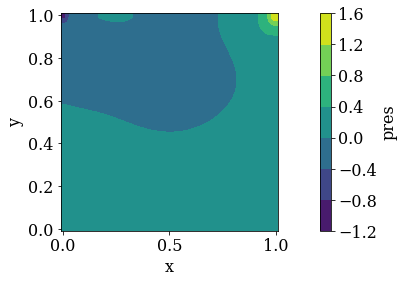

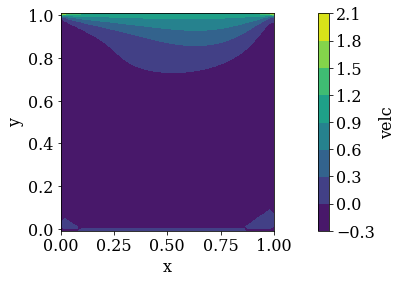

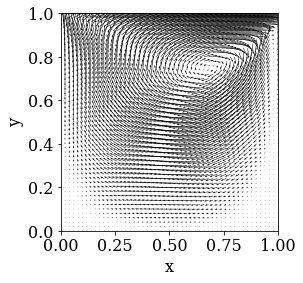

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_vector(gridx,gridy,'velc')